# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
# %pip install iso3166

In [92]:
!pip freeze > requirements.txt

### Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import iso3166
from datetime import datetime, timedelta

In [3]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
print(f'Rows: {df_data.shape[0]}\n'
      f'Columns: {df_data.shape[1]}')

Rows: 4324
Columns: 9


In [7]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [8]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [9]:
df_data.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [10]:
#Drop junk columns
df_data_clean = df_data.drop(labels=['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
df_data_clean.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [11]:
#Find duplicates
df_data_clean[df_data_clean.duplicated()]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
793,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success


In [12]:
# Drop duplicate
df_data_clean.drop(793, inplace=True)

In [13]:
# Double check if there are any more duplicates
df_data_clean.duplicated().values.any()

False

In [14]:
df_data_clean.isnull().sum()

Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

## Descriptive Statistics

In [15]:
# Get rid of commas in price string and convert to float
df_data_clean['Price'] = df_data_clean['Price'].str.replace(',', '', regex=True).astype(float)

In [16]:
df_data_clean.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [17]:
df_data_clean.describe()

,Price
count,963.00
mean,153.92
std,288.57
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


In [18]:
df_data_clean.loc[df_data_clean['Price'].idxmax()]

Organisation                                         RVSN USSR
Location          Site 110/37, Baikonur Cosmodrome, Kazakhstan
Date                                Tue Nov 15, 1988 03:00 UTC
Detail                                  Energiya/Buran | Buran
Rocket_Status                                    StatusRetired
Price                                                 5,000.00
Mission_Status                                         Success
Name: 1916, dtype: object

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [19]:
# Find top 20 companies
company_launches = df_data_clean['Organisation'].value_counts(ascending=False).reset_index(name='Num of Launches')
company_launches = company_launches[:20]

In [20]:
space_launches_bar = px.bar(company_launches, x='Organisation', y='Num of Launches', title='Space Mission Launches by Organisation',
                           height=400)
space_launches_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [21]:
df_data_status_clean = df_data_clean.copy()

In [22]:
# Clean up status column
df_data_status_clean['Rocket_Status'] = df_data_status_clean['Rocket_Status'].str.replace('Status', '', regex=True)
df_data_status_clean.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,Active,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,Active,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,Active,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,Active,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,Active,145.00,Success


In [23]:
active_retired = df_data_status_clean['Rocket_Status'].value_counts().reset_index(name='Num of Rockets').rename(columns={'Rocket_Status': 'Status'})
active_retired

,Status,Num of Rockets
0,Retired,3534
1,Active,789


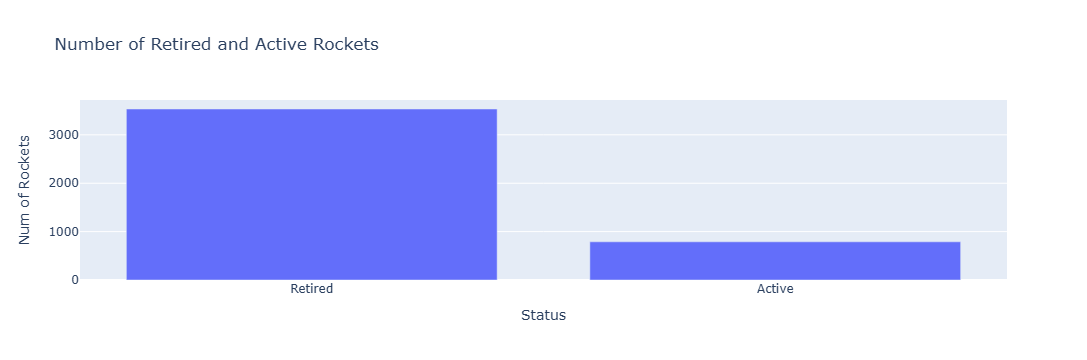

In [24]:
# Plot active vs retired rockets
active_retired_plot = px.bar(active_retired, x='Status', y='Num of Rockets',
                             title='Number of Retired and Active Rockets')
active_retired_plot.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [25]:
df_success_failure = df_data['Mission_Status'].value_counts().reset_index(name='Missions').rename(columns={
    'Mission_Status': 'Mission Status'})
df_success_failure

,Mission Status,Missions
0,Success,3879
1,Failure,339
2,Partial Failure,102
3,Prelaunch Failure,4


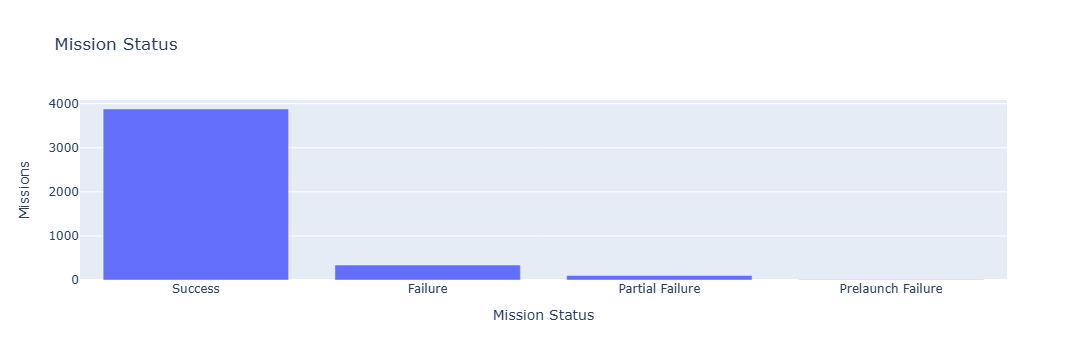

In [26]:
success_failure_bar = px.bar(df_success_failure, x='Mission Status', y='Missions', title='Mission Status')
success_failure_bar.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

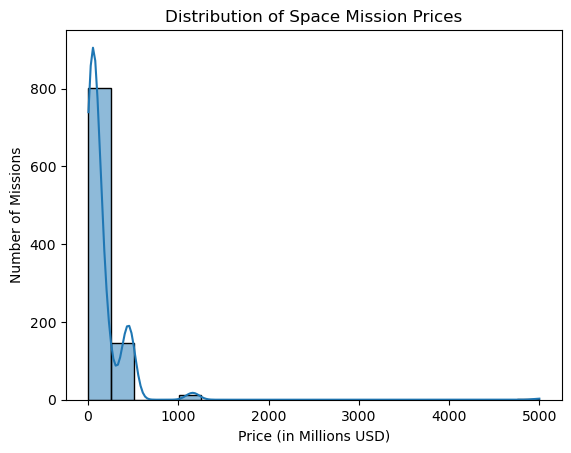

In [27]:
price_hist = sns.histplot(df_data_clean, x='Price', bins=20, kde=True)
plt.title('Distribution of Space Mission Prices')
plt.xlabel('Price (in Millions USD)')
plt.ylabel('Number of Missions')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [28]:
# Split location column
location_split = df_data_status_clean['Location'].str.split(',', expand=True)
# Create countries column
location_split['Countries'] = location_split[3].fillna(value=location_split[2]).fillna(value=location_split[1])
# Clean up leading and trailing whitespace
location_split['Countries'] = location_split['Countries'].str.strip()

In [29]:
# Add countries to main df
df_data_status_clean.insert(loc=3, column='Countries', value=location_split.Countries)

In [30]:
# Change country names to match with iso3166 labels
df_data_status_clean['Countries'] = df_data_status_clean['Countries'].replace(
    to_replace=['Russia', 'New Mexico', 'Yellow Sea', 'Shahrud Missile Test Site','Pacific Missile Range Facility','Barents Sea', 'Gran Canaria',
               'North Korea', 'South Korea', 'Iran', 'USA', 'Pacific Ocean'], 
                value=['Russian Federation', 'United States of America', 'China', 'Iran, Islamic Republic of', 
                       'United States of America', 'Russian Federation','United States of America', "Korea, Democratic People's Republic of",
                      'Korea, Republic of', 'Iran, Islamic Republic of', 'United States of America', 'United States of America'])

In [31]:
# Retrieve iso3166 code list
ISO = []
for country in df_data_status_clean['Countries']:
    try:
        ISO.append(iso3166.countries_by_name[country.upper()].alpha3)
    except KeyError as e:
        print(f"Fix: {e}")

In [32]:
df_data_status_clean.insert(loc=4, column='ISO', value=ISO)
df_data_status_clean.head()

,Organisation,Location,Date,Countries,ISO,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",United States of America,USA,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,Active,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",China,CHN,Long March 2D | Gaofen-9 04 & Q-SAT,Active,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",United States of America,USA,Starship Prototype | 150 Meter Hop,Active,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Kazakhstan,KAZ,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,Active,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",United States of America,USA,Atlas V 541 | Perseverance,Active,145.00,Success


In [33]:
# Count num of launches by country
df_country_launches = df_data_status_clean.groupby(by='ISO', as_index=False).agg({'Mission_Status': 'count'}).rename(
    columns={'Mission_Status': 'Num of Launches'})
df_country_launches.head()

,ISO,Num of Launches
0,AUS,6
1,BRA,3
2,CHN,268
3,FRA,303
4,IND,76


In [34]:
country_launches_chor = px.choropleth(df_country_launches, locations='ISO', color='Num of Launches',
                                      color_continuous_scale='matter', height=600)
country_launches_chor.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [35]:
# Count number of failures by country, includes failures and prelaunch failures
df_failures = df_data_status_clean[df_data_status_clean['Mission_Status'].isin(['Failure', 'Prelaunch Failure'])]
df_failures = df_failures.groupby(by=['ISO'], as_index=False).agg({'Mission_Status': 'count'}).rename(columns=({'Mission_Status': 'Failures'}))
df_failures.head()

,ISO,Failures
0,AUS,3
1,BRA,3
2,CHN,19
3,FRA,13
4,IND,8


In [36]:
failures_chor = px.choropleth(df_failures, locations='ISO', color='Failures',
                                      color_continuous_scale='matter', height=600)
failures_chor.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [37]:
df_sunburst = df_data_status_clean.groupby(by=['ISO', 'Organisation', 'Mission_Status'], as_index=False).agg({'Rocket_Status': 'count'}).rename(
    columns=({'Rocket_Status': 'Num of Missions'}))
df_sunburst.head()

,ISO,Organisation,Mission_Status,Num of Missions
0,AUS,AMBA,Success,1
1,AUS,CECLES,Failure,2
2,AUS,CECLES,Success,1
3,AUS,RAE,Failure,1
4,AUS,RAE,Success,1


In [38]:
sunburst = px.sunburst(df_sunburst, path=['ISO', 'Organisation', 'Mission_Status'], values='Num of Missions',
                       title='Mission Successes and Failures by Country and Organization', height=500)
sunburst.update_layout(xaxis_title='Num of Missions', yaxis_title='Country', coloraxis_showscale=False)
sunburst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [39]:
# Drop rows with no price
df_null_price_drop = df_data_status_clean.dropna()
df_null_price_drop.sample(10)

,Organisation,Location,Date,Countries,ISO,Detail,Rocket_Status,Price,Mission_Status
26,CASC,"Xichang Satellite Launch Center, China","Fri May 29, 2020 20:13 UTC",China,CHN,Long March 11 | XJS-G and XJS-H,Active,5.30,Success
592,Northrop,"LP-0B, Wallops Flight Facility, Virginia, USA","Sat Sep 07, 2013 03:27 UTC",United States of America,USA,Minotaur V | LADEE,Active,55.00,Success
1241,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Fri Jul 23, 1999 04:31 UTC",United States of America,USA,Space Shuttle Columbia | STS-93,Retired,450.00,Success
1626,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Mon Jun 21, 1993 13:07 UTC",United States of America,USA,Space Shuttle Endeavour | STS-57,Retired,450.00,Success
788,ULA,"SLC-37B, Cape Canaveral AFS, Florida, USA","Sun Jan 18, 2009 02:47 UTC",United States of America,USA,Delta IV Heavy | NROL-26,Active,350.00,Success
639,MHI,"LA-Y2, Tanegashima Space Center, Japan","Sat Jul 21, 2012 02:06 UTC",Japan,JPN,H-IIB | HTV-3,Retired,112.50,Success
1459,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Thu Feb 22, 1996 20:18 UTC",United States of America,USA,Space Shuttle Columbia | STS-75,Retired,450.00,Success
309,Northrop,"SLC-576E, Vandenberg AFB, California, USA","Tue Oct 31, 2017 21:37 UTC",United States of America,USA,Minotaur C (Taurus) | SkySat & Flock-3m,Active,45.00,Success
978,CASC,"LC-3, Xichang Satellite Launch Center, China","Thu Nov 18, 2004 10:45 UTC",China,CHN,Long March 2C | Shiyan-2,Active,30.80,Success
81,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Tue Nov 26, 2019 21:23 UTC",France,FRA,Ariane 5 ECA | Inmarsat 5 F5 & TIBA-1,Active,200.00,Success


In [40]:
# Sum prices by org
df_org_total = df_null_price_drop.groupby(by='Organisation', as_index=False).agg({'Price': 'sum',
                                                                                 'Mission_Status': 'count'}).sort_values(by='Price', ascending=False)
df_org_total.head()

,Organisation,Price,Mission_Status
14,NASA,"76,280.00",149
0,Arianespace,"16,345.00",96
21,ULA,"14,798.00",98
16,RVSN USSR,"10,000.00",2
2,CASC,"6,310.51",157


In [41]:
org_total_bar = px.bar(df_org_total, x='Organisation', y='Price', height=600)
org_total_bar.update_layout(yaxis_title='Total Spent(in Millions USD)')
org_total_bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [42]:
df_org_total['Price per Launch'] = df_org_total['Price'] / df_org_total['Mission_Status']
df_org_total = df_org_total.sort_values(by='Price per Launch', ascending=False)

In [43]:
df_org_total.describe()

,Price,Mission_Status,Price per Launch
count,25.00,25.00,25.00
mean,"5,929.04",38.52,276.10
std,"15,328.22",47.71,989.35
min,12.00,1.00,7.50
25%,168.00,3.00,32.49
50%,"1,241.00",13.00,47.35
75%,"3,930.00",67.00,95.47
max,"76,280.00",157.00,"5,000.00"


In [44]:
p_per_l_bar = px.bar(df_org_total, x='Organisation', y='Price per Launch', height=600, title='Organisation Pricer per Launch')
p_per_l_bar.update_layout(yaxis_title='Price per Launch (in Millions USD)')
p_per_l_bar.show()

# Chart the Number of Launches per Year

In [45]:
df_data_status_clean.head(10)

,Organisation,Location,Date,Countries,ISO,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",United States of America,USA,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,Active,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",China,CHN,Long March 2D | Gaofen-9 04 & Q-SAT,Active,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",United States of America,USA,Starship Prototype | 150 Meter Hop,Active,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Kazakhstan,KAZ,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,Active,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",United States of America,USA,Atlas V 541 | Perseverance,Active,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC",China,CHN,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",Active,64.68,Success
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Kazakhstan,KAZ,Soyuz 2.1a | Progress MS-15,Active,48.50,Success
7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",China,CHN,Long March 5 | Tianwen-1,Active,NaN,Success
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",United States of America,USA,Falcon 9 Block 5 | ANASIS-II,Active,50.00,Success
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",Japan,JPN,H-IIA 202 | Hope Mars Mission,Active,90.00,Success


In [46]:
# Convert date column strings to datetime
df_data_status_clean['Date'] = pd.to_datetime(df_data_status_clean['Date'], format='mixed', utc=True)
df_data_status_clean.head(10)

,Organisation,Location,Date,Countries,ISO,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,United States of America,USA,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,Active,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,China,CHN,Long March 2D | Gaofen-9 04 & Q-SAT,Active,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,United States of America,USA,Starship Prototype | 150 Meter Hop,Active,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Kazakhstan,KAZ,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,Active,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,United States of America,USA,Atlas V 541 | Perseverance,Active,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,China,CHN,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",Active,64.68,Success
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-07-23 14:26:00+00:00,Kazakhstan,KAZ,Soyuz 2.1a | Progress MS-15,Active,48.50,Success
7,CASC,"LC-101, Wenchang Satellite Launch Center, China",2020-07-23 04:41:00+00:00,China,CHN,Long March 5 | Tianwen-1,Active,NaN,Success
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2020-07-20 21:30:00+00:00,United States of America,USA,Falcon 9 Block 5 | ANASIS-II,Active,50.00,Success
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan",2020-07-19 21:58:00+00:00,Japan,JPN,H-IIA 202 | Hope Mars Mission,Active,90.00,Success


In [47]:
# Count num of launches each year
df_yearly_launches = df_data_status_clean['Date'].dt.year.value_counts().sort_index()
df_yearly_launches.head()

Date
1957     3
1958    28
1959    20
1960    39
1961    52
Name: count, dtype: int64

In [48]:
yearly_launches_bar = px.bar(df_yearly_launches, x=df_yearly_launches.index, y=df_yearly_launches.values,
                             title='Yearly Launches (1957-2020)', height=600)
yearly_launches_bar.update_layout(xaxis_title='Year', yaxis_title='Num of Launches')
yearly_launches_bar.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [49]:
# Add year month column
df_data_status_clean['YearMonth'] = df_data_status_clean['Date'].dt.tz_localize(None).dt.to_period('M')

In [50]:
# Group by year month column
df_yearmonth_launches = df_data_status_clean.groupby(by='YearMonth', as_index=False).agg(
    {'Mission_Status': 'count'}).rename(columns={'YearMonth': 'Date', 'Mission_Status': 'Missions'})

In [51]:
# Need to make period a timestamp
df_yearmonth_launches['Date'] = df_yearmonth_launches['Date'].dt.to_timestamp()

In [52]:
# Find month with most launches
max_month = df_yearmonth_launches.loc[df_yearmonth_launches['Missions'].idxmax()]
print(max_month)

Date        1971-12-01 00:00:00
Missions                     18
Name: 164, dtype: object


In [53]:
# Calculate Rolling Average
df_yearmonthly_rolling = df_yearmonth_launches['Missions'].rolling(window=12, min_periods=1).mean()
df_yearmonthly_rolling.head()

0   1.00
1   1.00
2   1.00
3   1.25
4   1.60
Name: Missions, dtype: float64

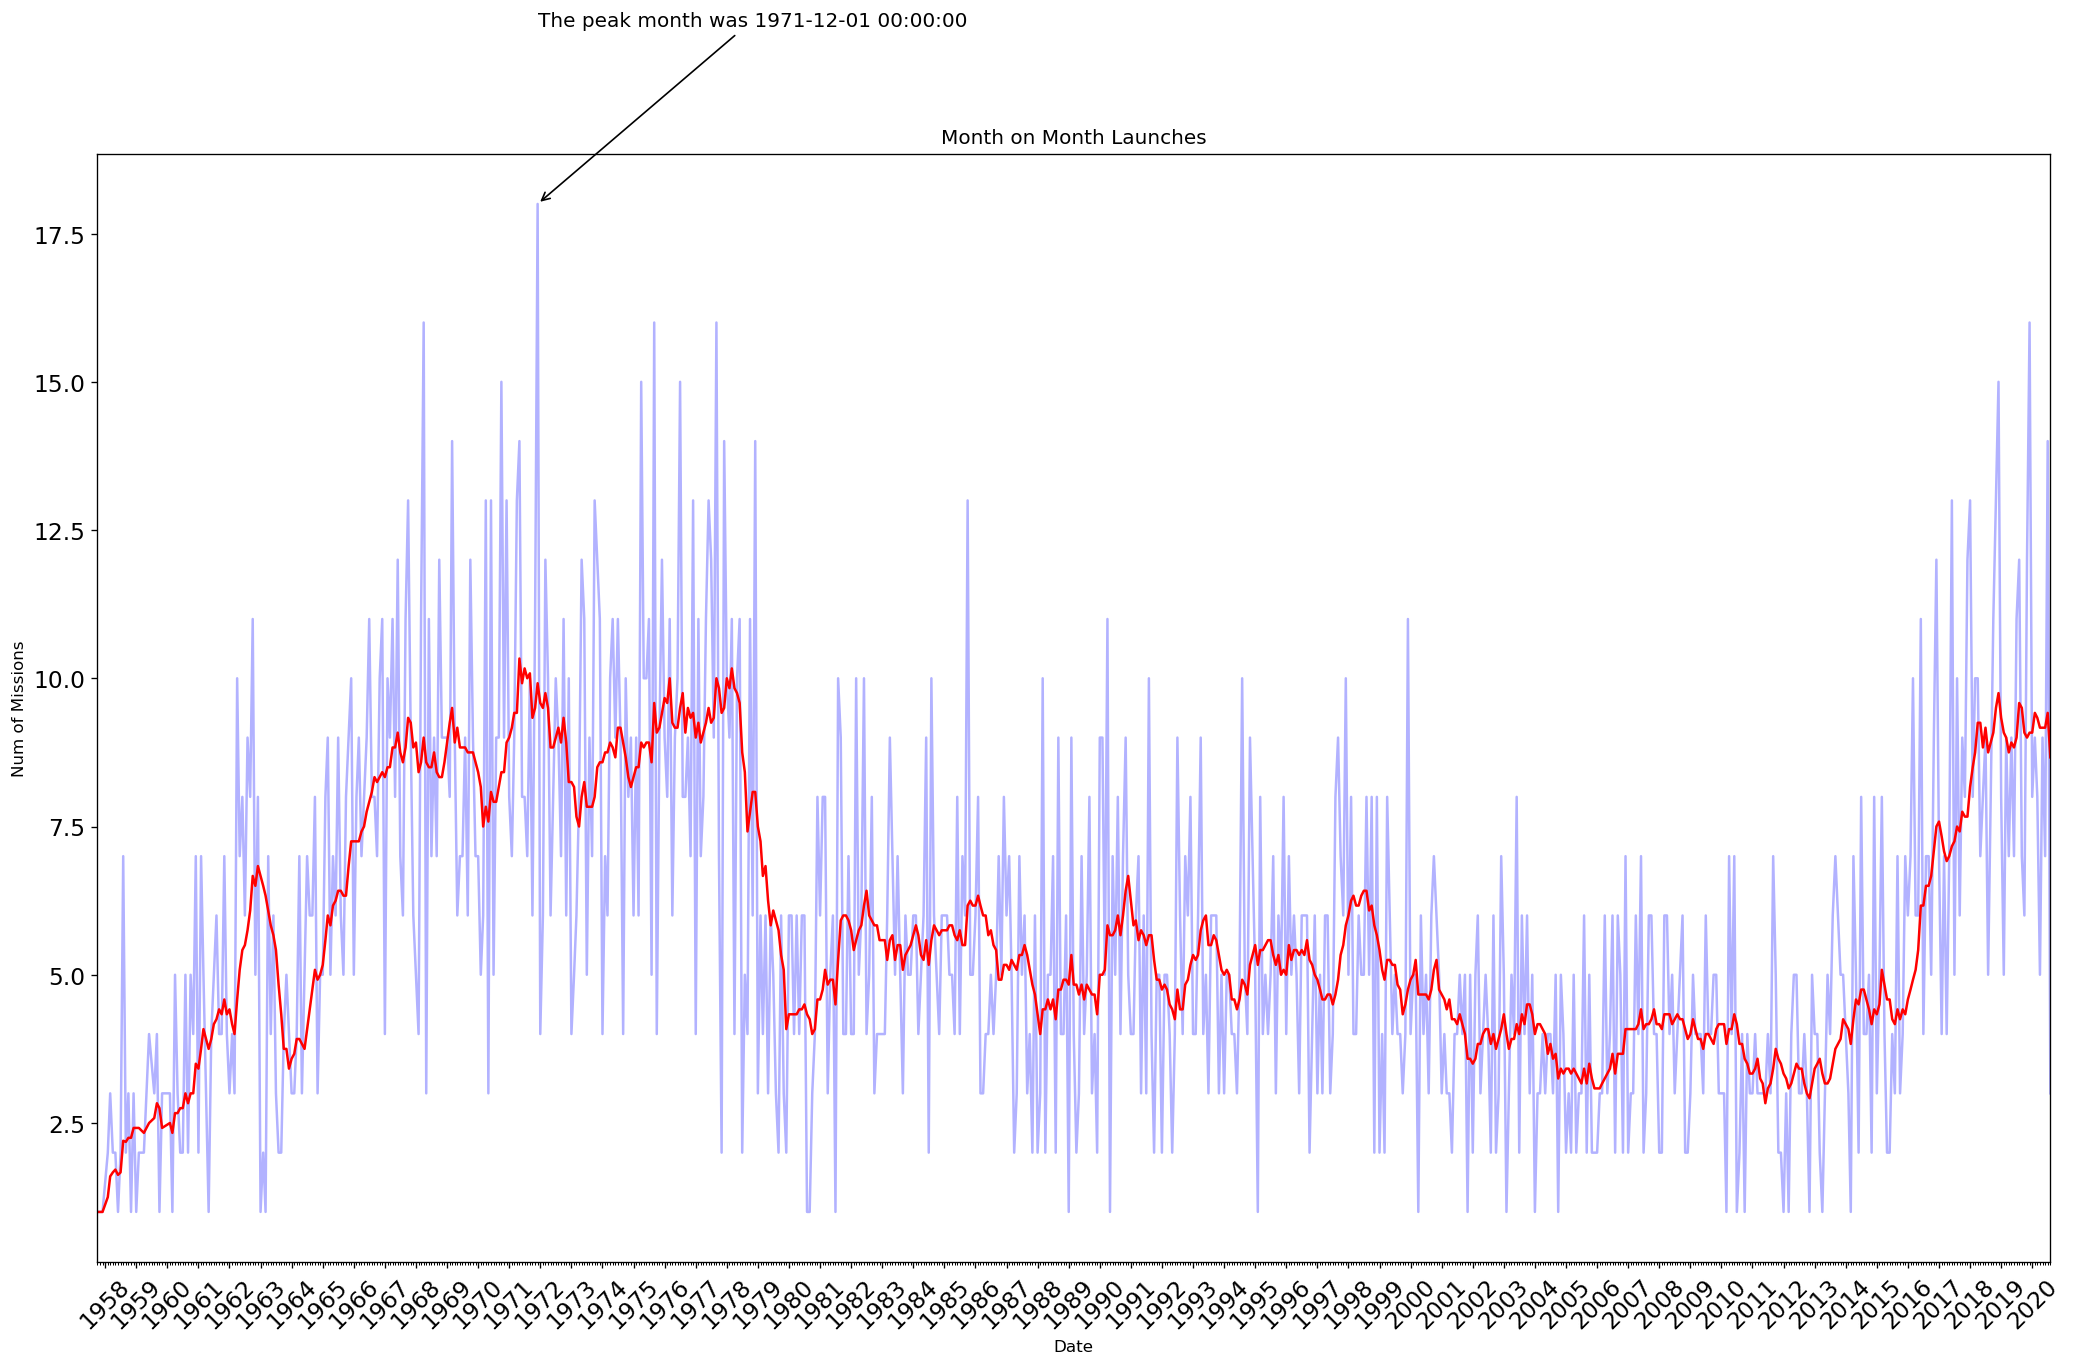

In [54]:
# Clean up graph 
plt.figure(figsize=(21,12), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title('Month on Month Launches')

ax1 = plt.gca()
ax1.set_xlim(df_yearmonth_launches['Date'].min(), df_yearmonth_launches['Date'].max())

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_yearmonth_launches['Date'], df_yearmonth_launches['Missions'], alpha=0.3, color='blue')
ax1.plot(df_yearmonth_launches['Date'], df_yearmonthly_rolling, color='red')
ax1.annotate(f'The peak month was {max_month['Date']}', xy=(max_month['Date'], max_month['Missions']),
             xytext=(max_month['Date'], max_month['Missions']+3), fontsize=12, arrowprops=dict(facecolor='black', arrowstyle='->'))
ax1.set_xlabel('Date')
ax1.set_ylabel('Num of Missions')
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [55]:
# Find average for each month
monthly_avg = df_yearmonth_launches.groupby(by=df_yearmonth_launches['Date'].dt.month).agg(
    {'Missions': 'mean'}).reset_index().rename(columns=({'Date': 'Month'}))
monthly_avg

,Month,Missions
0,1,4.47
1,2,5.33
2,3,5.69
3,4,6.08
4,5,5.26
5,6,6.38
6,7,5.66
7,8,5.92
8,9,5.89
9,10,6.15


In [56]:
# Month with the highest number of average launches
monthly_avg.loc[monthly_avg['Missions'].idxmax()]

Month      12.00
Missions    7.26
Name: 11, dtype: float64

In [57]:
# Find total launches each month
df_yearmonth_launches.head()
# Map season yearmonth launches
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'
df_yearmonth_launches['season'] = df_yearmonth_launches['Date'].dt.month.map(month_to_season)

In [58]:
# Season with the highest number of average launches
seasonal_launches = df_yearmonth_launches.groupby(by='season', as_index=False).agg({'Missions': 'mean'})
seasonal_launches

,season,Missions
0,fall,5.78
1,spring,5.68
2,summer,5.99
3,winter,5.70


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [59]:
# Average year on year price
avg_yearly_price = df_null_price_drop.groupby(df_data_status_clean['Date'].dt.year).agg(
    {'Price': 'mean'}).reset_index()

In [60]:
# Drop years with no prices available
avg_yearly_price = avg_yearly_price.dropna()
avg_yearly_price.sample(5)

,Date,Price
29,2000,173.12
2,1966,59.00
8,1972,"1,160.00"
36,2007,125.70
19,1990,289.15


In [61]:
avg_yp_rolling = avg_yearly_price['Price'].rolling(window=5).mean()
avg_yp_rolling.head()

0      NaN
1      NaN
2      NaN
3      NaN
4   132.26
Name: Price, dtype: float64

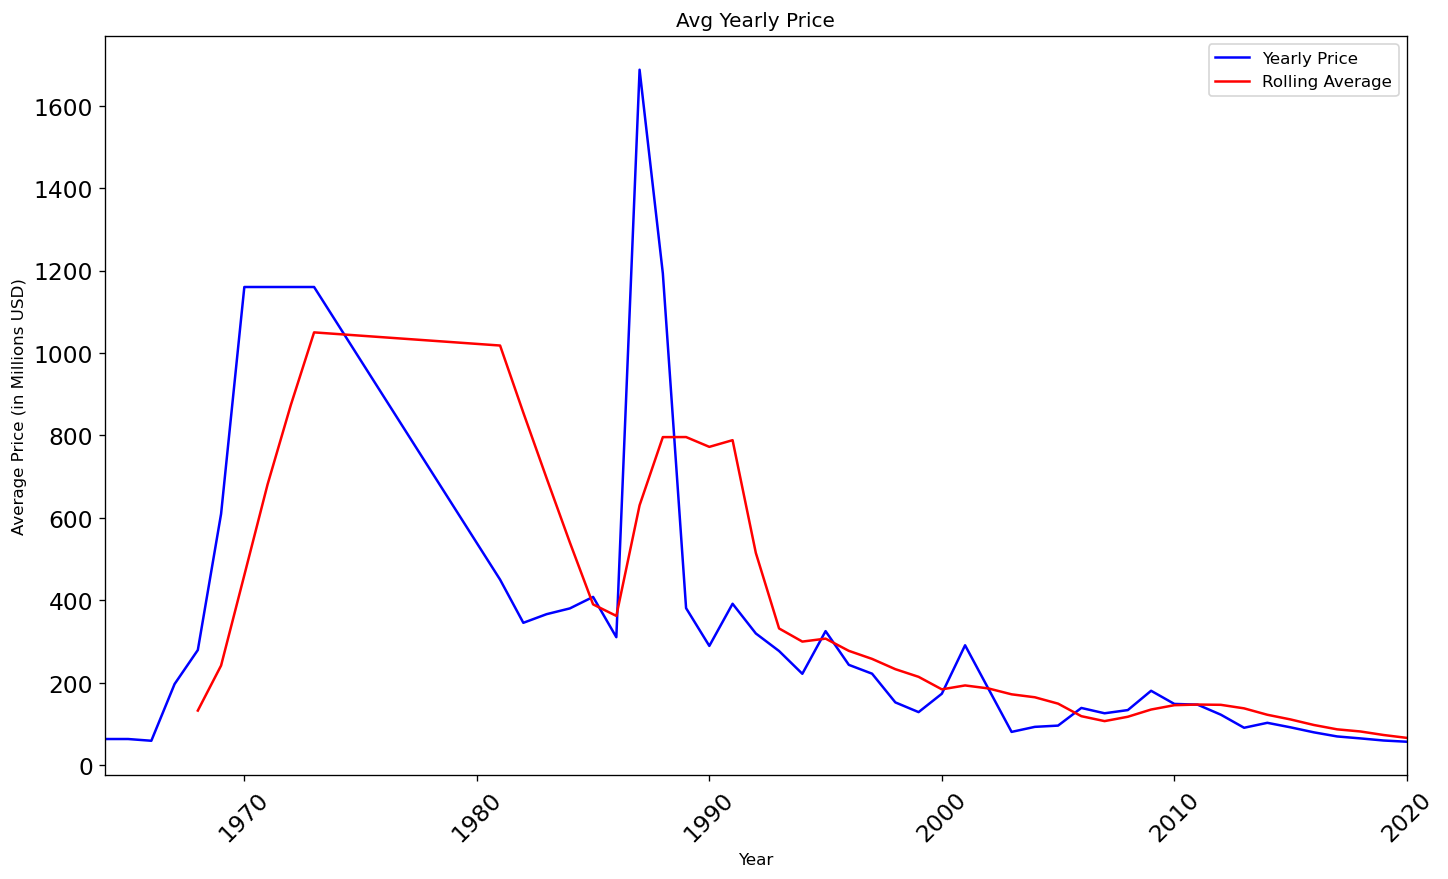

In [62]:
plt.figure(figsize=(14, 8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title('Avg Yearly Price')

ax1 = plt.gca()
ax1.set_xlim(avg_yearly_price['Date'].min(), avg_yearly_price['Date'].max())

ax1.plot(avg_yearly_price['Date'], avg_yearly_price['Price'], color='blue')
ax1.plot(avg_yearly_price['Date'], avg_yp_rolling, color='red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Price (in Millions USD)')
ax1.legend(['Yearly Price', 'Rolling Average'])
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [63]:
# Find organisations with 10 most launches
df_top_10_org = df_org_total.sort_values(by='Mission_Status', ascending=False)[:10]
df_top_10_org

,Organisation,Price,Mission_Status,Price per Launch
2,CASC,"6,310.51",157,40.19
14,NASA,"76,280.00",149,511.95
20,SpaceX,"5,444.00",99,54.99
21,ULA,"14,798.00",98,151.00
0,Arianespace,"16,345.00",96,170.26
15,Northrop,"3,930.00",83,47.35
8,ISRO,"2,177.00",67,32.49
12,MHI,"3,532.50",37,95.47
23,VKS RF,"1,548.90",33,46.94
22,US Air Force,"1,550.92",26,59.65


In [64]:
# Return df with only these launches
df_top_org_launches = df_data_status_clean[df_data_status_clean['Organisation'].isin(df_top_10_org['Organisation'])]

In [65]:
print(type(df_top_org_launches['Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [66]:
df_top_org_launches = df_top_org_launches.groupby(['Organisation', df_top_org_launches['Date'].dt.year]).agg(
    {'Mission_Status': 'count'}).reset_index()

In [67]:
cumulative_missions = df_top_org_launches.groupby(by=['Organisation', 'Date']).sum().groupby(level=[0]).cumsum()
cumulative_missions.reset_index(inplace=True)
cumulative_missions = cumulative_missions.rename(columns=({'Date': 'Year', 'Mission_Status': 'Num of Missions'}))
cumulative_missions.head()

,Organisation,Year,Num of Missions
0,Arianespace,1984,3
1,Arianespace,1985,7
2,Arianespace,1986,10
3,Arianespace,1987,12
4,Arianespace,1988,18


In [68]:
year_by_year_launches_org = px.line(df_top_org_launches, x='Date', y ='Mission_Status', color='Organisation',
                                    title='Year by Year Launches per Top 10 Organisations', height=600)
year_by_year_launches_org.update_layout(xaxis_title='Year', yaxis_title='Num of Missions')
year_by_year_launches_org.show()

In [69]:
org_cumulative_plot = px.line(cumulative_missions, x='Year', y='Num of Missions', color='Organisation', height=600,
                                title='Year on Year Cumulative Launches by the Top 10 Organisations')
org_cumulative_plot.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [70]:
# Create a df for the Cold War
df_cold_war = df_data_status_clean[df_data_status_clean['Date'].dt.year <= 1991]

In [71]:
df_cold_war.head()

,Organisation,Location,Date,Countries,ISO,Detail,Rocket_Status,Price,Mission_Status,YearMonth
1717,CASC,"LC-3, Xichang Satellite Launch Center, China",1991-12-28 12:00:00+00:00,China,CHN,Long March 3 | DFH-2A-T5,Retired,NaN,Partial Failure,1991-12
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,Kazakhstan,KAZ,Rokot/Briz K | GVM Demo Flight,Retired,NaN,Success,1991-12
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00+00:00,Russian Federation,RUS,Tsyklon-3 | Intercosmos 25 & Magion 3,Retired,NaN,Success,1991-12
1720,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France",1991-12-16 22:19:00+00:00,France,FRA,"Ariane 44L | Telecom 2A, Inmarsat 2F3",Retired,NaN,Success,1991-12
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,United States of America,USA,Atlas II | Eutelsat 2F3,Retired,NaN,Success,1991-12


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [72]:
# Switch Kazakhstan to USSR
df_USSR_USA = df_cold_war.copy()
df_USSR_USA['Countries'] = df_USSR_USA['Countries'].replace(to_replace='Kazakhstan', value='Russian Federation')
df_USSR_USA.head()

,Organisation,Location,Date,Countries,ISO,Detail,Rocket_Status,Price,Mission_Status,YearMonth
1717,CASC,"LC-3, Xichang Satellite Launch Center, China",1991-12-28 12:00:00+00:00,China,CHN,Long March 3 | DFH-2A-T5,Retired,NaN,Partial Failure,1991-12
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,Russian Federation,KAZ,Rokot/Briz K | GVM Demo Flight,Retired,NaN,Success,1991-12
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00+00:00,Russian Federation,RUS,Tsyklon-3 | Intercosmos 25 & Magion 3,Retired,NaN,Success,1991-12
1720,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France",1991-12-16 22:19:00+00:00,France,FRA,"Ariane 44L | Telecom 2A, Inmarsat 2F3",Retired,NaN,Success,1991-12
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,United States of America,USA,Atlas II | Eutelsat 2F3,Retired,NaN,Success,1991-12


In [73]:
df_USSR_USA = df_USSR_USA[df_USSR_USA['Countries'].isin(['Russian Federation', 'United States of America'])]

In [74]:
df_cold_war_total = df_USSR_USA['Countries'].value_counts()
df_cold_war_total

Countries
Russian Federation          1770
United States of America     662
Name: count, dtype: int64

In [75]:
ussr_usa_total_pie = px.pie(df_cold_war_total, values=df_cold_war_total.values, names=df_cold_war_total.index,
                            title='Total USSR vs USA Launches', height=400)
ussr_usa_total_pie.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [76]:
# Get year on year launches between the US and USSR
df_cold_war_yearly_launches = df_USSR_USA.groupby(by=['Countries', df_USSR_USA['Date'].dt.year]).agg({
    'Mission_Status': 'count'}).reset_index()
df_cold_war_yearly_launches.tail()

,Countries,Date,Mission_Status
65,United States of America,1987,6
66,United States of America,1988,7
67,United States of America,1989,16
68,United States of America,1990,26
69,United States of America,1991,18


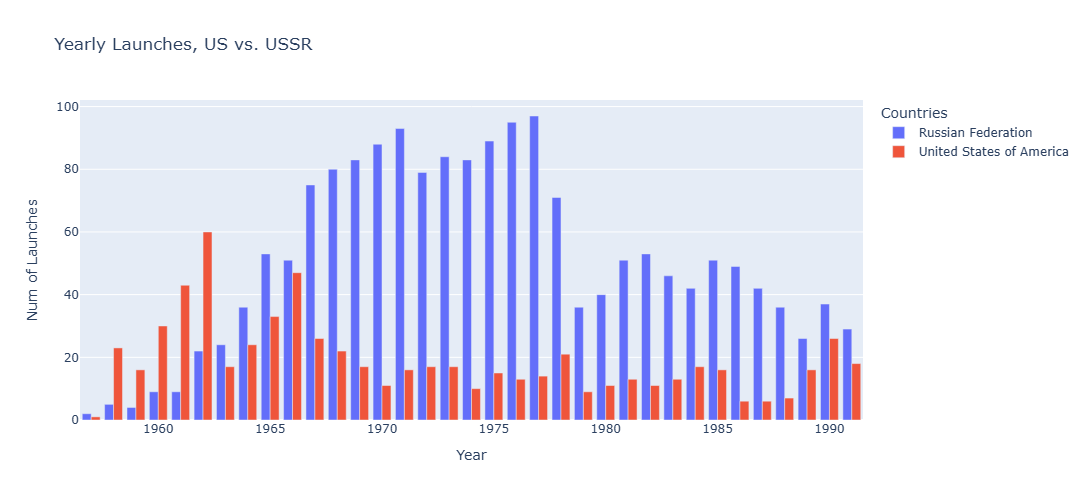

In [77]:
cold_war_yearly_bar = px.bar(df_cold_war_yearly_launches, x='Date', y='Mission_Status', color='Countries',
                             title='Yearly Launches, US vs. USSR', height=500, width=1000, barmode='group')
cold_war_yearly_bar.update_layout(xaxis_title='Year', yaxis_title='Num of Launches')
cold_war_yearly_bar.show()

## Chart the Total Number of Mission Failures Year on Year.

In [78]:
df_cold_war_failures = df_USSR_USA[df_USSR_USA['Mission_Status'].isin(['Failure', 'Prelaunch Failure'])]
df_cold_war_failures = df_cold_war_failures.groupby(by=['Countries', df_cold_war_failures['Date'].dt.year.rename('Year')]).agg(
    {'Mission_Status': 'count'}).rename(columns=({'Mission_Status': 'Failures'})).reset_index()
df_cold_war_failures.head()

,Countries,Year,Failures
0,Russian Federation,1958,4
1,Russian Federation,1959,1
2,Russian Federation,1960,6
3,Russian Federation,1961,4
4,Russian Federation,1962,7


In [79]:
cold_war_failure_bar = px.bar(df_cold_war_failures, x='Year', y='Failures', color='Countries', barmode='group',
                              title='Year on Year Mission Failures', height=500)
cold_war_failure_bar.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [80]:
df_cold_war_failure_rate = pd.merge(left=df_cold_war_yearly_launches, right=df_cold_war_failures, left_on=['Countries', 'Date'], 
                                        right_on=['Countries', 'Year'], how='left') 
df_cold_war_failure_rate = df_cold_war_failure_rate.drop('Year', axis=1)
df_cold_war_failure_rate.head()

,Countries,Date,Mission_Status,Failures
0,Russian Federation,1957,2,NaN
1,Russian Federation,1958,5,4.00
2,Russian Federation,1959,4,1.00
3,Russian Federation,1960,9,6.00
4,Russian Federation,1961,9,4.00


In [81]:
df_cold_war_failure_rate = df_cold_war_failure_rate.fillna(0)

In [82]:
df_cold_war_failure_rate['Failure %'] = df_cold_war_failure_rate['Failures'] / df_cold_war_failure_rate['Mission_Status']

In [83]:
cold_war_failure_rate_bar = px.bar(df_cold_war_failure_rate, x='Date', y='Failure %', color='Countries', barmode='group',
                              title='Year on Year Failure Rate', height=500)
cold_war_failure_rate_bar.update_layout(xaxis_title='Year', yaxis_title='Failure Rate')
cold_war_failure_rate_bar.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [84]:
# group by country and year to start
df_test = df_data_status_clean.groupby(by=['Countries', df_data_status_clean['Date'].dt.year.rename('Year')]).agg(
    {'Mission_Status': 'count'})
df_test = df_test.rename(columns=({'Mission_Status': 'Launches'}))
# Find the country with the most launches every year
df_test = df_test['Launches'].groupby(by='Year', group_keys=False).nlargest(1, keep='all')
df_country_yearly_launches = pd.DataFrame(df_test)
df_country_yearly_launches = df_country_yearly_launches.reset_index()
# Combine ties into one row
df_country_yearly_launches = df_country_yearly_launches.groupby('Year').agg(
    {'Launches': 'first', 'Countries': lambda x: ', '.join(x)}).reset_index()
df_country_yearly_launches

,Year,Launches,Countries
0,1957,2,Kazakhstan
1,1958,23,United States of America
2,1959,16,United States of America
3,1960,30,United States of America
4,1961,43,United States of America
...,...,...,...
59,2016,27,United States of America
60,2017,30,United States of America
61,2018,39,China
62,2019,34,China


In [85]:
top_country_yearly_bar = px.bar(df_country_yearly_launches, x='Year', y='Launches',
                                title='Country with the Most Yearly Launches', height=500,
                               hover_data='Countries', color='Countries')
top_country_yearly_bar.show()

In [86]:
# Testing for successful launches
# group by country and year to start
df_test_2 = df_data_status_clean[df_data_status_clean['Mission_Status'] == 'Success']
df_test_2 = df_test_2.groupby(by=['Countries', df_data_status_clean['Date'].dt.year.rename('Year')]).agg(
    {'Mission_Status': 'count'})
df_test_2 = df_test_2.rename(columns=({'Mission_Status': 'Successful Launches'}))
# Find the country with the most launches every year
df_test_2 = df_test_2['Successful Launches'].groupby(by='Year', group_keys=False).nlargest(1, keep='all')
df_country_yearly_success = pd.DataFrame(df_test_2)
df_country_yearly_success = df_country_yearly_success.reset_index()
# Combine ties into one row
df_country_yearly_success = df_country_yearly_success.groupby('Year').agg(
    {'Successful Launches': 'first', 'Countries': lambda x: ', '.join(x)}).reset_index()

In [87]:
year_success_country_bar = px.bar(df_country_yearly_success, x='Year', y='Successful Launches',
                                title='Country with the Most Yearly Successful Launches', height=500, width=1000,
                               hover_data='Countries', color='Countries')
year_success_country_bar.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [88]:
# First group by Organisation and year
org_year_2 = df_data_status_clean.groupby(by=['Organisation', df_data_status_clean['Date'].dt.year.rename('Year')]).agg(
    {'Mission_Status': 'count'})
org_year_2 = org_year_2.rename(columns=({'Mission_Status': 'Launches'}))
# Find the country with the most launches every year
org_year_2 = org_year_2['Launches'].groupby(by='Year', group_keys=False).nlargest(1, keep='all')
df_org_yearly = pd.DataFrame(org_year_2)
df_org_yearly = df_org_yearly.reset_index()
# Combine ties into one row
df_org_yearly = df_org_yearly.groupby('Year').agg(
    {'Launches': 'first', 'Organisation': lambda x: ', '.join(x)}).reset_index()
df_org_yearly

,Year,Launches,Organisation
0,1957,2,RVSN USSR
1,1958,12,US Navy
2,1959,10,US Air Force
3,1960,21,US Air Force
4,1961,23,US Air Force
...,...,...,...
59,2016,22,CASC
60,2017,18,SpaceX
61,2018,37,CASC
62,2019,27,CASC


In [89]:
year_on_year_org_bar = px.bar(df_org_yearly, x='Year', y='Launches',
                                title='Organisation with the Most Yearly Launches', height=500, width=1000,
                               hover_data='Organisation', color='Organisation')
year_on_year_org_bar.show()